In [ ]:
import os
import torchvision.models as models 
import torch.nn as nn
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torchvision
from glob import glob
from torchinfo import summary
import numpy as np
import torch.functional as F
import torchvision.transforms as T
from tqdm.auto import tqdm
import torchmetrics
device0 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size=256

dataload

In [ ]:
#fit
class CustomDataset(Dataset):
    def __init__(self, data,label ,transform=None, target_transform=None):
        self.PPG_data=data
        self.PPG_label=label
    def __len__(self):
        return len(self.PPG_data)

    def __getitem__(self, idx):
        signal_tensor=self.PPG_data[idx]
        AF_signal_label=self.PPG_label[idx]
        return signal_tensor,AF_signal_label
    
train_csv_path ='../../data/Mix_artifacts/wavefrom/'

train_data_list=glob(train_csv_path+'/**/*.csv')
train_data=torch.empty(len(train_data_list),1,3000)
train_label=torch.empty(len(train_data_list),1)

for i in tqdm(range(len(train_data_list))):
    signal_csv=pd.read_csv(train_data_list[i])['PPG'].to_numpy()
    train_data_list[i].find('positive')
    AF_signal_label=0
    if train_data_list[i].find('positive')!=-1:
        AF_signal_label=1
    else:
        AF_signal_label=0
    train_data[i]=torch.tensor(signal_csv)
    train_label[i]=torch.tensor([AF_signal_label])

train_dataset=CustomDataset(train_data,train_label)
dataset_size = len(train_dataset)
train_size = int(dataset_size * 0.9)
validation_size = dataset_size-train_size
validation_dataset, test_dataset = random_split(train_dataset, [validation_size, train_size])
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

model

In [15]:
from sympy import flatten


class CNN1D(nn.Module):
    def __init__(self):
        super(CNN1D,self).__init__()
        self.conv1=nn.Conv1d(in_channels=1, out_channels=50, kernel_size=3,padding='same', padding_mode='replicate')
        self.relu=nn.ReLU()
        self.dropout=nn.Dropout1d(0.5)
        self.pool1=torch.nn.MaxPool1d(kernel_size=5)
        self.conv2=nn.Conv1d(in_channels=50, out_channels=50, kernel_size=3,padding='same', padding_mode='replicate')
        self.relu2=nn.ReLU()
        self.dropout2=nn.Dropout1d(0.5)
        self.pool2=torch.nn.MaxPool1d(kernel_size=5)
        self.fc1=nn.Linear(50*120, 200, bias=False)
        self.fc2=nn.Linear(200, 1, bias=False)
    def forward(self,x):
        
        x=self.conv1(x)
        x=self.relu(x)
        x=self.dropout(x)
        x=self.pool1(x)
        x=self.conv2(x)
        x=self.relu2(x)
        x=self.dropout2(x)
        x=self.pool2(x)
        x = torch.flatten(x, 1)
        x=self.fc1(x)
        x=self.fc2(x)
        return x


    
accuracy = torchmetrics.Accuracy(task="binary", num_classes=1).to(device0)
model = CNN1D().to(device0)
criterion = nn.BCEWithLogitsLoss().to(device0)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
summary(model,(batch_size,1,3000))

Layer (type:depth-idx)                   Output Shape              Param #
CNN1D                                    [256, 1]                  --
├─Conv1d: 1-1                            [256, 50, 3000]           200
├─ReLU: 1-2                              [256, 50, 3000]           --
├─Dropout1d: 1-3                         [256, 50, 3000]           --
├─MaxPool1d: 1-4                         [256, 50, 600]            --
├─Conv1d: 1-5                            [256, 50, 600]            7,550
├─ReLU: 1-6                              [256, 50, 600]            --
├─Dropout1d: 1-7                         [256, 50, 600]            --
├─MaxPool1d: 1-8                         [256, 50, 120]            --
├─Linear: 1-9                            [256, 200]                1,200,000
├─Linear: 1-10                           [256, 1]                  200
Total params: 1,207,950
Trainable params: 1,207,950
Non-trainable params: 0
Total mult-adds (G): 1.62
Input size (MB): 3.07
Forward/backward pa

Train

epoch: 1/1000 train_loss : 0.7411 train_accuracy: 0.5004 val_loss : 0.6931  val_accuracy: 0.5117
epoch: 2/1000 train_loss : 0.6935 train_accuracy: 0.5026 val_loss : 0.6931  val_accuracy: 0.5156


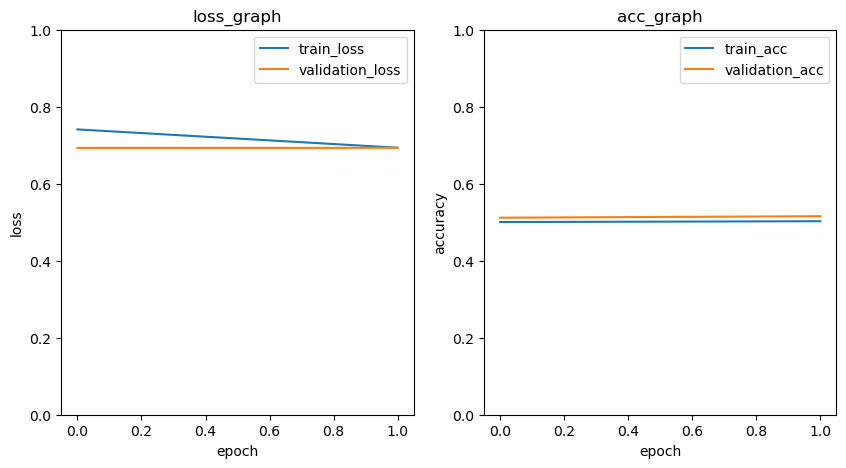

epoch: 3/1000 train_loss : 0.6934 train_accuracy: 0.5059 val_loss : 0.6931  val_accuracy: 0.5201
epoch: 4/1000 train_loss : 0.6932 train_accuracy: 0.5053 val_loss : 0.6930  val_accuracy: 0.5174
epoch: 5/1000 train_loss : 0.6929 train_accuracy: 0.5095 val_loss : 0.6917  val_accuracy: 0.5195
epoch: 6/1000 train_loss : 0.6916 train_accuracy: 0.5139 val_loss : 0.6901  val_accuracy: 0.5243
epoch: 7/1000 train_loss : 0.6912 train_accuracy: 0.5158 val_loss : 0.6885  val_accuracy: 0.5273
epoch: 8/1000 train_loss : 0.6905 train_accuracy: 0.5146 val_loss : 0.6867  val_accuracy: 0.5222
epoch: 9/1000 train_loss : 0.6896 train_accuracy: 0.5180 val_loss : 0.6873  val_accuracy: 0.5177
epoch: 10/1000 train_loss : 0.6889 train_accuracy: 0.5213 val_loss : 0.6860  val_accuracy: 0.5204
epoch: 11/1000 train_loss : 0.6892 train_accuracy: 0.5176 val_loss : 0.6855  val_accuracy: 0.5201
epoch: 12/1000 train_loss : 0.6885 train_accuracy: 0.5154 val_loss : 0.6836  val_accuracy: 0.5316
epoch: 13/1000 train_loss :

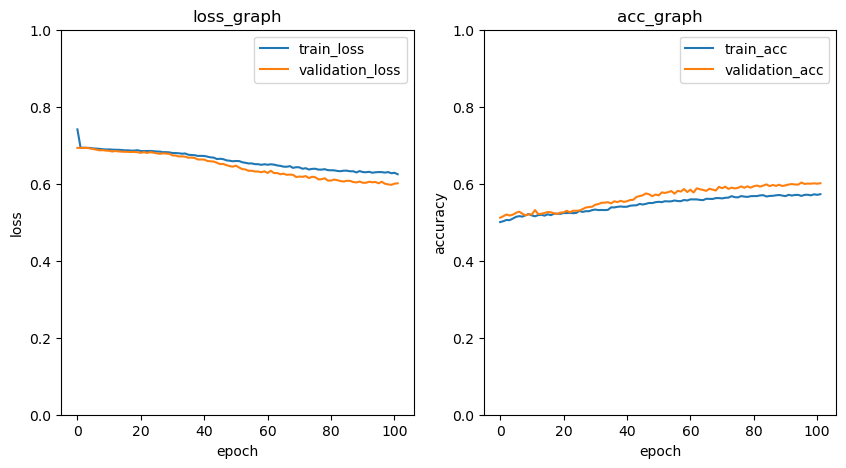

epoch: 103/1000 train_loss : 0.6293 train_accuracy: 0.5702 val_loss : 0.6010  val_accuracy: 0.5998
epoch: 104/1000 train_loss : 0.6256 train_accuracy: 0.5742 val_loss : 0.5999  val_accuracy: 0.5992
epoch: 105/1000 train_loss : 0.6262 train_accuracy: 0.5730 val_loss : 0.5997  val_accuracy: 0.6010
epoch: 106/1000 train_loss : 0.6254 train_accuracy: 0.5742 val_loss : 0.5967  val_accuracy: 0.5980
epoch: 107/1000 train_loss : 0.6259 train_accuracy: 0.5749 val_loss : 0.5994  val_accuracy: 0.5980
epoch: 108/1000 train_loss : 0.6271 train_accuracy: 0.5736 val_loss : 0.5998  val_accuracy: 0.6016
epoch: 109/1000 train_loss : 0.6246 train_accuracy: 0.5733 val_loss : 0.5993  val_accuracy: 0.6004
epoch: 110/1000 train_loss : 0.6248 train_accuracy: 0.5725 val_loss : 0.5981  val_accuracy: 0.5995
epoch: 111/1000 train_loss : 0.6252 train_accuracy: 0.5733 val_loss : 0.6006  val_accuracy: 0.5944
epoch: 112/1000 train_loss : 0.6254 train_accuracy: 0.5729 val_loss : 0.5977  val_accuracy: 0.6016
epoch: 113

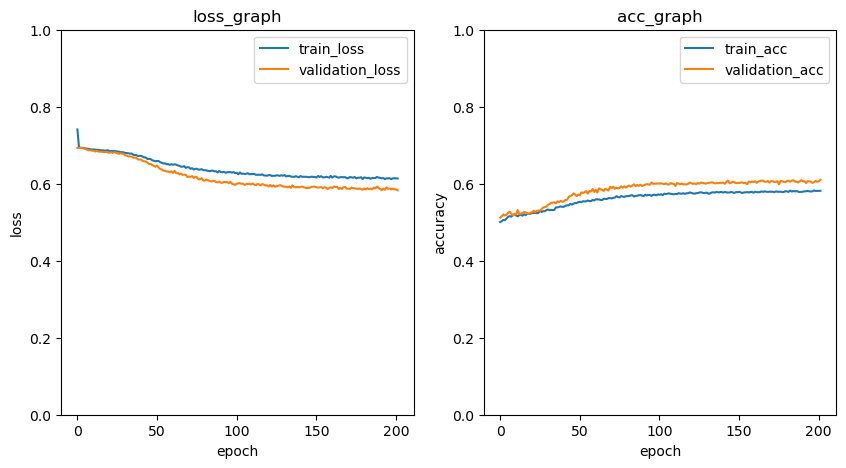

epoch: 203/1000 train_loss : 0.6120 train_accuracy: 0.5825 val_loss : 0.5849  val_accuracy: 0.6061
epoch: 204/1000 train_loss : 0.6132 train_accuracy: 0.5816 val_loss : 0.5876  val_accuracy: 0.6055
epoch: 205/1000 train_loss : 0.6126 train_accuracy: 0.5814 val_loss : 0.5850  val_accuracy: 0.6079
epoch: 206/1000 train_loss : 0.6112 train_accuracy: 0.5805 val_loss : 0.5826  val_accuracy: 0.6082
epoch: 207/1000 train_loss : 0.6143 train_accuracy: 0.5804 val_loss : 0.5889  val_accuracy: 0.6082
epoch: 208/1000 train_loss : 0.6161 train_accuracy: 0.5798 val_loss : 0.5874  val_accuracy: 0.6070
epoch: 209/1000 train_loss : 0.6143 train_accuracy: 0.5802 val_loss : 0.5872  val_accuracy: 0.6070
epoch: 210/1000 train_loss : 0.6149 train_accuracy: 0.5832 val_loss : 0.5859  val_accuracy: 0.6073
epoch: 211/1000 train_loss : 0.6137 train_accuracy: 0.5823 val_loss : 0.5865  val_accuracy: 0.6094
epoch: 212/1000 train_loss : 0.6138 train_accuracy: 0.5818 val_loss : 0.5825  val_accuracy: 0.6085
epoch: 213

KeyboardInterrupt: 

In [16]:
MIN_loss=5000
train_loss_list=[]
val_loss_list=[]
train_acc_list=[]
val_acc_list=[]
for epoch in range(1000):
    
    train_count=0
    running_loss = 0.0
    acc_loss=0
    for x, y in train_dataloader:
        model.train()
        y = y.to(device0).float()
        train_count+=1
        x=x.to(device0).float()
        optimizer.zero_grad()  # optimizer zero 로 초기화
        predict = model(x).to(device0)
        cost = criterion(predict, y) # cost 구함
        acc=accuracy(predict, y)
        cost.backward() # cost에 대한 backward 구함
        optimizer.step() 
        running_loss += cost.item()
        acc_loss+=acc
    
    train_loss_list.append((running_loss/train_count))
    train_acc_list.append((acc_loss/train_count).cpu().detach().numpy())
#validation
    model.eval()
    val_count=0
    val_running_loss=0.0
    val_acc_loss=0
    with torch.no_grad():
        for x, y in validation_dataloader:
            y = y.to(device0).float()
            val_count+=1
            x=x.to(device0).float()
            
            predict = model(x).to(device0)
            acc=accuracy(predict, y)
            cost = criterion(predict, y)
            val_running_loss+=cost.item()
            val_acc_loss+=acc
        print(f"\repoch: {epoch+1}/{1000} train_loss : {running_loss/train_count:.4f} train_accuracy: {acc_loss/train_count:.4f} val_loss : {val_running_loss/val_count:.4f}  val_accuracy: {val_acc_loss/val_count:.4f}")
        
        val_loss_list.append((val_running_loss/val_count))
        val_acc_list.append((val_acc_loss/val_count).cpu().detach().numpy())
    if epoch%100==1:
        plt.figure(figsize=(10,5))
        plt.subplot(1, 2, 1) 
        plt.title('loss_graph')
        plt.plot(np.arange(epoch+1),train_loss_list,label='train_loss')
        plt.plot(np.arange(epoch+1),val_loss_list,label='validation_loss')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.ylim([0, 1]) 
        plt.legend()
        plt.subplot(1, 2, 2)  
        plt.title('acc_graph')
        plt.plot(np.arange(epoch+1),train_acc_list,label='train_acc')
        plt.plot(np.arange(epoch+1),val_acc_list,label='validation_acc')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.ylim([0, 1]) 
        plt.legend()
        plt.show()
        
    if MIN_loss>(val_running_loss/val_count):
        torch.save(model.state_dict(), '../../model/architecture_waveform/CNN_1D_30_TypeAll_call_back.pt')
        MIN_loss=(val_running_loss/val_count)
torch.save(model.state_dict(), '../../model/architecture_waveform/CNN_1D_30_TypeAll.pt')

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1) 
plt.title('loss_graph')
plt.plot(np.arange(epoch+1),train_loss_list,label='train_loss')
plt.plot(np.arange(epoch+1),val_loss_list,label='validation_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0, 1]) 
plt.legend()
plt.subplot(1, 2, 2)  
plt.title('acc_graph')
plt.plot(np.arange(epoch+1),train_acc_list,label='train_acc')
plt.plot(np.arange(epoch+1),val_acc_list,label='validation_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0, 1]) 
plt.legend()
plt.show()